In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from astropy.convolution import Gaussian1DKernel
from astropy.convolution import convolve
from scipy.signal import find_peaks
from scipy.optimize import curve_fit



# import lightkurve as lk
# from scipy.optimize import curve_fit

# from astropy.convolution import Gaussian1DKernel
# from astropy.convolution import convolve
sys.path.insert(0, "../")

import warnings
warnings.filterwarnings('ignore')

from michael import janet

Hi there. Welcome to the good place.


In [2]:
uni = pd.read_csv("/Users/oliver hall/Research/unicorn/data/unicorn.csv", index_col=0)

In [28]:
index = 50

obs = {
    'Teff' : [uni.loc[index, 'Teff'], uni.loc[index, 'e_Teff']],
    'logg' : [uni.loc[index, 'logg'], uni.loc[index, 'e_logg']],
    'MG' : [uni.loc[index, 'MGna'], uni.loc[index, 'e_MGna']],
    'bp_rp' : [uni.loc[index, 'bp_rp'], uni.loc[index, 'e_bp_rp']]
}

obs['logT'] = [0., 0.]
obs['logT'][0] = np.log10(obs['Teff'][0])
obs['logT'][1] = obs['Teff'][1] / (np.log(10)*obs['Teff'][0])

obs['logbp_rp'] = [0., 0.]
obs['logbp_rp'][0] = np.log10(obs['bp_rp'][0])
obs['logbp_rp'][1] = obs['bp_rp'][1] / (np.log(10)*obs['bp_rp'][0])

# Assume 10% uncertainty in absence of errors
for col in ['Teff','logg','MG','bp_rp']:
    if not np.isfinite(obs[col][1]):
        obs[col][1] = 0.1*obs[col][0]
        
    if not np.isfinite(obs[col][0]):
        obs = None
        use_prior = False
        print('Not enough information to use the prior until we allow for it.')
        break

In [29]:
j = janet.boot(uni, index=index, use_prior=True, obs=obs)

Making folder /Users/oliver hall/Research/unicorn/data/eleanor/2200113593132819200/...
Found star in Sector(s) 16 17 24
No eleanor postcard has been made for your target (yet). Using TessCut instead.
Inflating...
No eleanor postcard has been made for your target (yet). Using TessCut instead.
Inflating...
No eleanor postcard has been made for your target (yet). Using TessCut instead.
Inflating...
KDE built on 11586 values.
!! Input data are outside range of KDE. Prior not available. !!
### Running Simple Astropy Lomb-Scargle on Sector 16-17 on star 2200113593132819200 ###
### Completed Simple Astropy Lomb-Scargle for Sector 16-17 on star 2200113593132819200 ###
### Running Wavelet Estimation for Sector 16-17 on star 2200113593132819200 ###


  0%|          | 0/152 [00:00<?, ?it/s]

### Completed Wavelet Estimation for Sector 16-17 on star 2200113593132819200 ###
### Running Composite ACF estimation for Sector 16-17 on star 2200113593132819200 ###
### Completed Composite ACF estimation for Sector 16-17 on star 2200113593132819200 ###
### Running Simple Astropy Lomb-Scargle on Sector 24 on star 2200113593132819200 ###
### Completed Simple Astropy Lomb-Scargle for Sector 24 on star 2200113593132819200 ###
### Running Wavelet Estimation for Sector 24 on star 2200113593132819200 ###


  0%|          | 0/79 [00:00<?, ?it/s]

### Completed Wavelet Estimation for Sector 24 on star 2200113593132819200 ###
### Running Composite ACF estimation for Sector 24 on star 2200113593132819200 ###
### Completed Composite ACF estimation for Sector 24 on star 2200113593132819200 ###
### Running ACF Estimation on star 2200113593132819200 ###
### Completed ACF Estimation on star 2200113593132819200 ###

------ Decoding Overall Period Flag 612 ------
512: One or more sectors disagrees strongly across all estimates with the others. This may indicate signal from a background star present in those sectors.
64: The ACF period is potentially a harmonic of the 'best' period (or vice versa!)
32: The ACF period does not match the 'best' period within 2 sigma.
4: Best rotation is from the Composite Autocorrelation Function (CACF) method.

No other flags raised. 



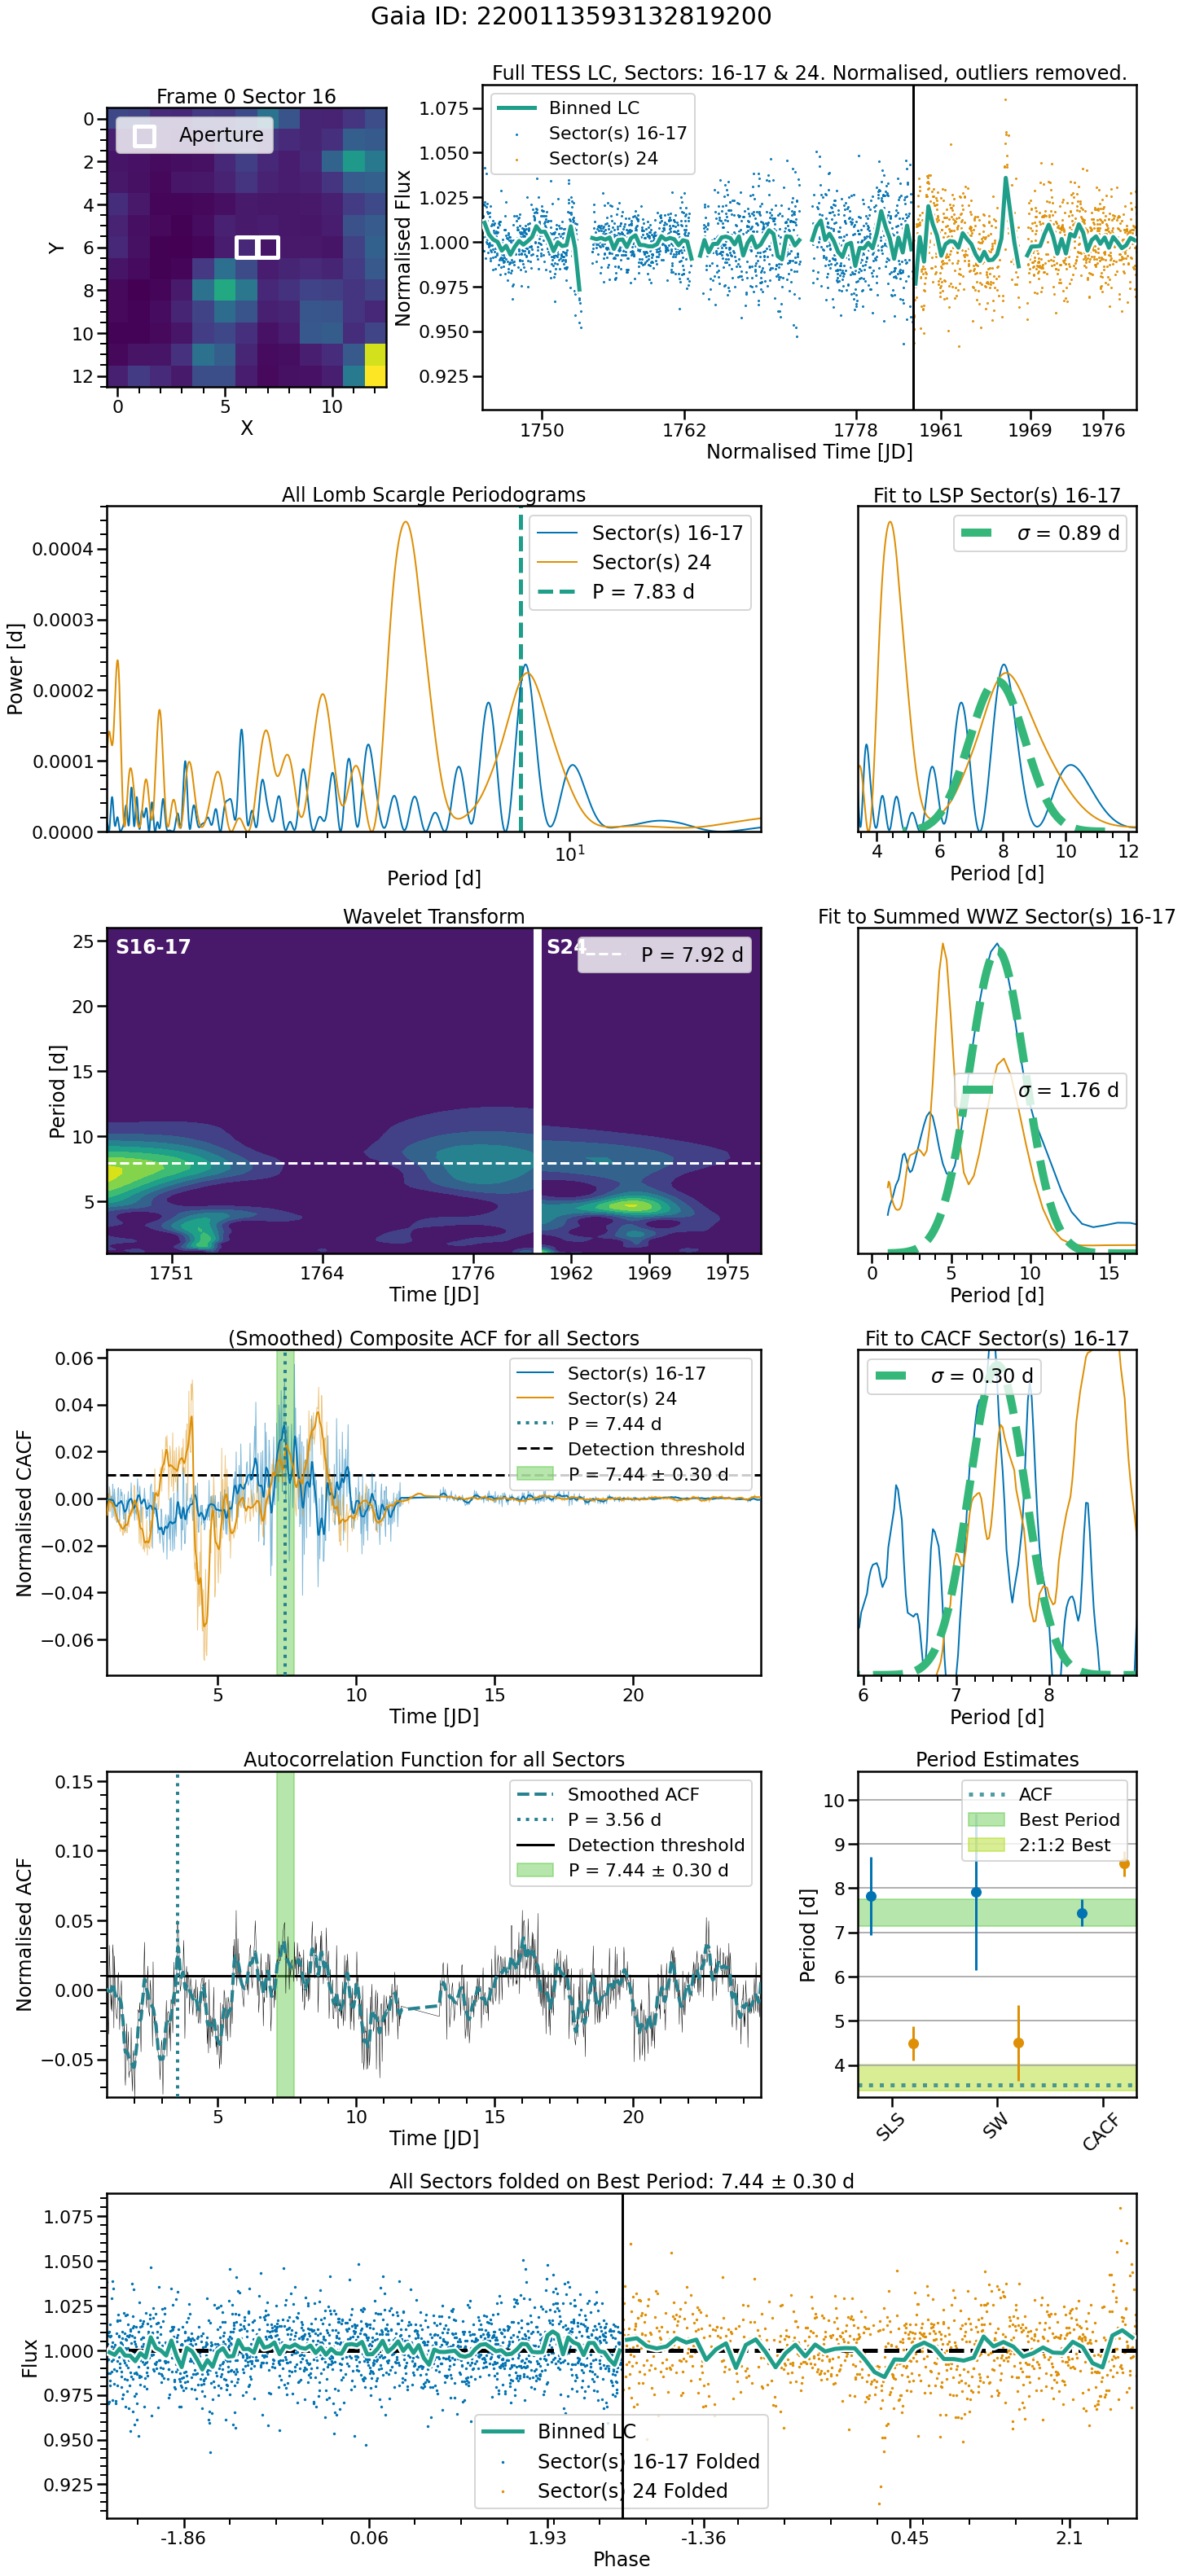

In [30]:
j.run(period_range = (1., 26.))

In [31]:
train = j.prior.train

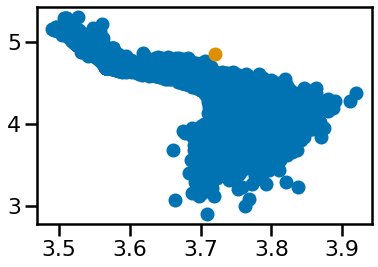

In [32]:
plt.scatter(train.logT, train.logg)
plt.scatter(obs['logT'][0], obs['logg'][0])

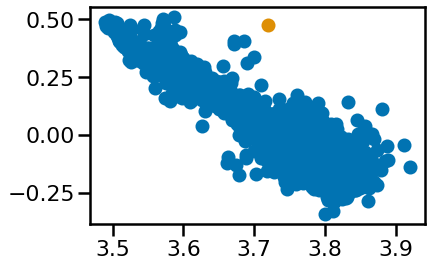

In [33]:
plt.scatter(train.logT, train.logbp_rp)
plt.scatter(obs['logT'][0], obs['logbp_rp'][0])

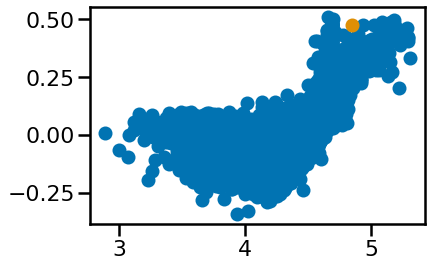

In [34]:
plt.scatter(train.logg, train.logbp_rp)
plt.scatter(obs['logg'][0], obs['logbp_rp'][0])

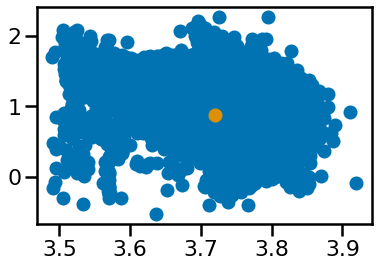

In [35]:
plt.scatter(train.logT, train.logP)
plt.scatter(obs['logT'][0], np.log10(j.results.loc['best','overall']))